### Setting up catalog with pics

How to import src without it?

In [5]:
os.chdir('/Users/martaplonka/Documents/DeepLearning/MonkeysKaggle')

In [6]:
os.getcwd()

'/Users/martaplonka/Documents/DeepLearning/MonkeysKaggle'

### Import libraries

In [7]:
import os
import src.dataset.MonkeyDataset as md
import src.dataset.RandomImage as rI
from torchvision.transforms import ToPILImage
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.pyplot import imshow
%matplotlib inline
from matplotlib import image
from matplotlib import pyplot
import pathlib
import IPython.display as display

### Download the files from Kaggle (run one time) and quick check of catague

In [5]:
#md.MonkeyDataset('data', transform=None, phase='training', download=True)

In [8]:
path = '/Users/martaplonka/Documents/DeepLearning/MonkeysKaggle/data/training/training'

In [9]:
path = pathlib.Path(path)
image_count = len(list(path.glob('*/*.jpg')))
image_count

1096

In [10]:
second = list(path.glob('n2/*'))

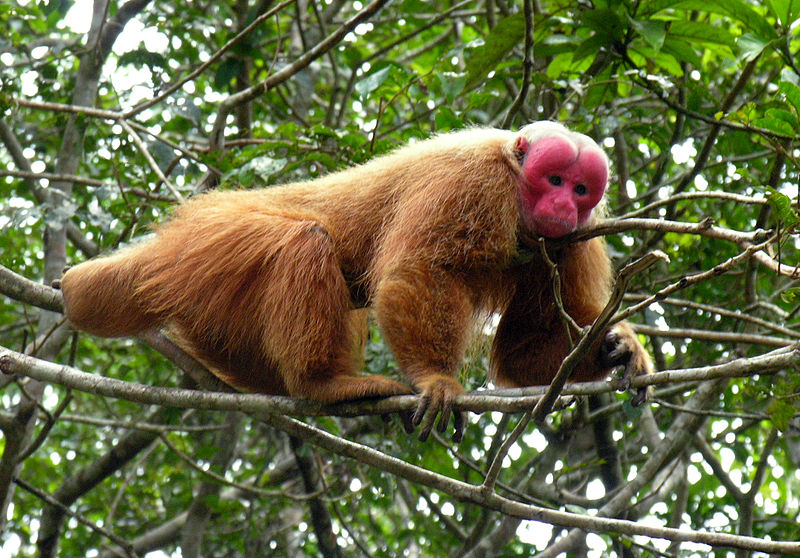

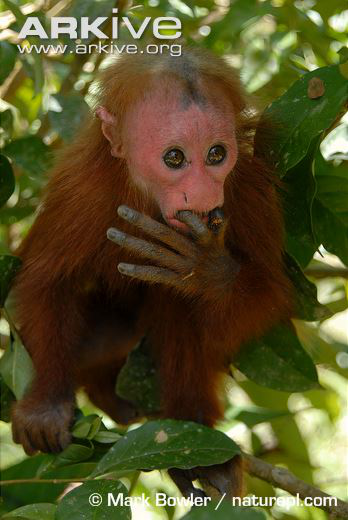

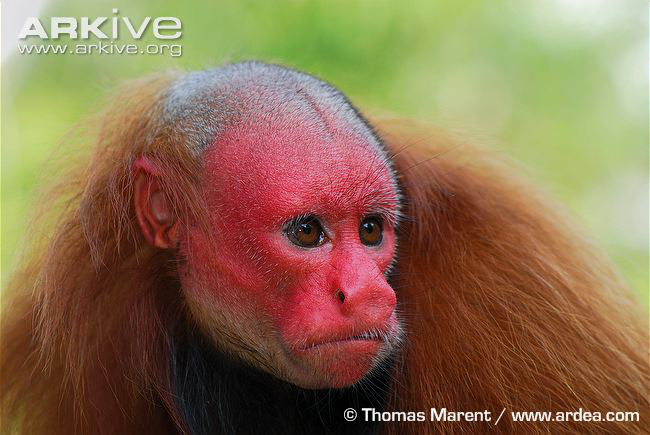

In [11]:
for image_path in second[:3]:
    display.display(Image.open(str(image_path)))

# Creating dataset with Andrew PyTorch

In [13]:
dataset_train = md.MonkeyDataset('data', transform=None, phase='training', download=False) 

Przykladowy tensor dla obrazka, caly wiersz to tuple z tensora i kategorii. Ale nie widzi tego jako targetu, trzeba to chyba bedzie przerabiac

In [14]:
dataset_train[0]

(tensor([[[0.8667, 0.8667, 0.8667,  ..., 0.9255, 0.9294, 0.9176],
          [0.8667, 0.8667, 0.8667,  ..., 0.9451, 0.9373, 0.9255],
          [0.8667, 0.8667, 0.8667,  ..., 0.9373, 0.9333, 0.9333],
          ...,
          [0.6706, 0.6745, 0.6941,  ..., 0.5686, 0.5804, 0.5843],
          [0.6627, 0.6549, 0.6745,  ..., 0.5725, 0.5882, 0.6000],
          [0.6549, 0.6549, 0.6667,  ..., 0.5686, 0.6000, 0.6196]],
 
         [[0.8667, 0.8667, 0.8667,  ..., 0.9255, 0.9294, 0.9176],
          [0.8667, 0.8667, 0.8667,  ..., 0.9451, 0.9373, 0.9255],
          [0.8667, 0.8667, 0.8667,  ..., 0.9373, 0.9333, 0.9333],
          ...,
          [0.5804, 0.5804, 0.6078,  ..., 0.5922, 0.5961, 0.6039],
          [0.5608, 0.5647, 0.5804,  ..., 0.5961, 0.6039, 0.6196],
          [0.5529, 0.5529, 0.5725,  ..., 0.5922, 0.6157, 0.6392]],
 
         [[0.8667, 0.8667, 0.8667,  ..., 0.9176, 0.9216, 0.9098],
          [0.8667, 0.8667, 0.8667,  ..., 0.9373, 0.9294, 0.9176],
          [0.8667, 0.8667, 0.8667,  ...,

Obrazki maja rozne wielkosci

In [15]:
print(dataset_train[2][0].shape)
print(dataset_train[0][0].shape)

torch.Size([3, 332, 500])
torch.Size([3, 852, 1296])


In [16]:
pixels = pd.DataFrame(columns = ['id', 'width', 'height'])
for i in range(len(dataset_train)):
    temp = pd.DataFrame([[i, dataset_train[i][0].shape[1], dataset_train[i][0].shape[2]]], 
                       columns = ['id', 'width', 'height'])
    pixels = pixels.append(temp, ignore_index= True)    

In [17]:
pixels_agg = pixels.groupby(['width', 'height']).count().reset_index()

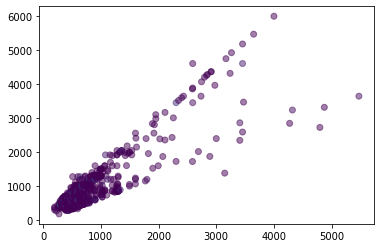

In [18]:
plt.scatter(pixels_agg['width'], pixels_agg['height'], c=pixels_agg['id'], alpha=0.5)
plt.show()

### Showing random pic from DataSet

y = 6-mico_argentatus


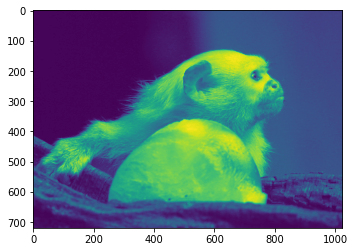

In [22]:
rI.get_random_monkey(dataset_train, random = True, cat_num = None, pic_num = None )

# THE EXPLORATION WILL CONTINUE...

# LEARNING
## Import PIC, show PIC, info about PIC and convert to array 

### 1. Using MATPLOT LIB

Import image directly from the drive

In [24]:
from PIL import Image
from matplotlib import image
from matplotlib.pyplot import imshow

In [25]:
image2 = Image.open('data/training/training/n0/n018.jpg')

In [26]:
image2.format, image2.mode, image2.size

('JPEG', 'RGB', (1024, 679))

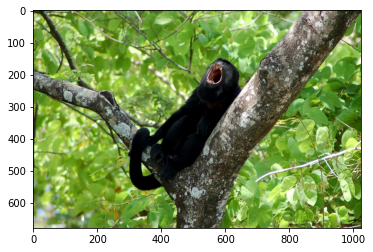

In [27]:
imshow(image2)

Convert to array

In [28]:
data = image.imread('data/training/training/n0/n018.jpg')

In [29]:
data[1]

array([[37, 46, 17],
       [35, 46, 14],
       [55, 69, 34],
       ...,
       [37, 29, 16],
       [37, 27, 15],
       [40, 30, 20]], dtype=uint8)

In [30]:
data.dtype, data.shape

(dtype('uint8'), (679, 1024, 3))

Show pic based on array

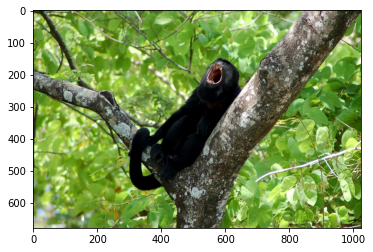

In [31]:
pyplot.imshow(data)
pyplot.show()

### 2. Using PILLOW

In [32]:
from PIL import Image
from numpy import asarray

image = Image.open('data/training/training/n0/n0022.jpg')

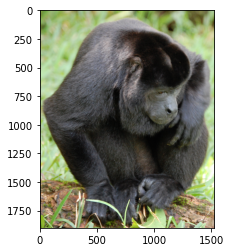

In [33]:
imshow(image)

In [34]:
data = asarray(image)
data[1]

array([[132, 175,  70],
       [128, 173,  68],
       [126, 171,  66],
       ...,
       [170, 197, 144],
       [169, 196, 143],
       [168, 195, 142]], dtype=uint8)

In [35]:
data.shape

(1900, 1526, 3)

In [36]:
image3 = Image.fromarray(data)
image3.format, image3.mode, image3.size

(None, 'RGB', (1526, 1900))

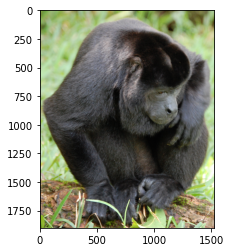

In [37]:
imshow(image3)

#  LEARNING
## How to prepare data for modelling - Basic PILLOW

Czasami potrzebujemy zeby wystandaryzowac rozmiar zdjec

In [38]:
from PIL import Image
image = Image.open('data/training/training/n0/n0022.jpg')

thumbnail zmienia rozmair zdjecia ale zachowuje aspect ratio oryginalnego obrazka

In [39]:
print(image.size)
image.thumbnail((100,100))
print(image.size)

(1526, 1900)
(80, 100)


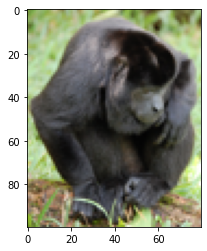

In [40]:
imshow(image)

resize() ignoruje aspect ratio

In [41]:
image = Image.open('data/training/training/n0/n0022.jpg')
print(image.size)
img_resized = image.resize((200,200))
print(img_resized.size)

(1526, 1900)
(200, 200)


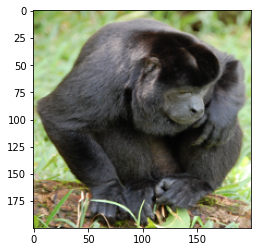

In [42]:
imshow(img_resized)

### Data augmentation

In [43]:
from PIL import Image
from matplotlib import pyplot
image = Image.open('data/training/training/n0/n0022.jpg')

Flipowanie

In [44]:
hoz_flip = image.transpose(Image.FLIP_LEFT_RIGHT)
ver_flip = image.transpose(Image.FLIP_TOP_BOTTOM)

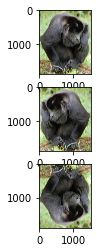

In [45]:
pyplot.subplot(311)
pyplot.imshow(image)
pyplot.subplot(312)
pyplot.imshow(hoz_flip)
pyplot.subplot(313)
pyplot.imshow(ver_flip)
pyplot.show()

Rotacja

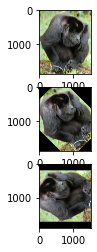

In [46]:
pyplot.subplot(311)
pyplot.imshow(image)
# rotate 45 degrees
pyplot.subplot(312)
pyplot.imshow(image.rotate(45))
# rotate 90 degrees
pyplot.subplot(313)
pyplot.imshow(image.rotate(90))
pyplot.show()

Cropping

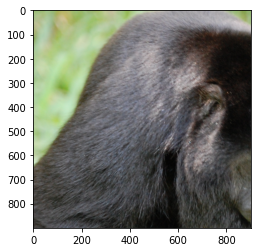

In [47]:
cropped = image.crop((100, 100, 1000, 1000))
imshow(cropped)

# PYTORCH HOW TO PREPARE DATA

In [52]:
from torch.utils.data import Dataset
import torchvision as tv
import torch.utils.data as data
from torchvision import transforms, datasets
from torchvision.datasets import ImageFolder

In [49]:
BATCH_SIZE = 1000

In [50]:
preprocessing = transforms.Compose([
                transforms.RandomResizedCrop(256, scale=(0.5, 1.0)),
                transforms.RandomHorizontalFlip(),
                transforms.ToTensor(),
                transforms.Normalize(0, 1)
            ])

In [54]:
train_data = datasets.ImageFolder('/Users/martaplonka/Documents/DeepLearning/MonkeysKaggle/data/training/training', transform = preprocessing)
train_data_loader = data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True,  num_workers=4)

In [55]:
test_data = datasets.ImageFolder('/Users/martaplonka/Documents/DeepLearning/MonkeysKaggle/data/validation/validation', transform = preprocessing)
test_data_loader = data.DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True,  num_workers=4)

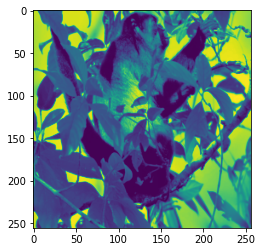

In [56]:
x, _ = train_data[10] 
imshow(x.numpy()[0])

y = 0-alouatta_palliata


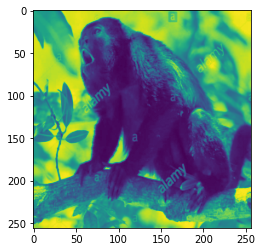

In [57]:
rI.get_random_monkey(train_data, random = True, cat_num = None, pic_num = None)

# KERAS HOW TO PREPARE DATA

Uzyc klasy ImageDataGenerator. Jej konstruktor zawiera argumenty do processingu obrazow jak pixels scaling i data augmentation.
The default ‘batch_size‘ is 32, which means that 32 randomly selected images from across the classes in the dataset will be returned in each batch when training. Larger or smaller batches may be desired. You may also want to return batches in a deterministic order when evaluating a model, which you can do by setting ‘shuffle‘ to ‘False.’
Wiecej info w: https://keras.io/api/preprocessing/image/

In [58]:
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

Using TensorFlow backend.


In [59]:
tf.__version__

'2.2.0'

In [60]:
CLASS_NAMES = ['alouatta_palliata','erythrocebus_patas','cacajao_calvus','macaca_fuscata','cebuella_pygmea',
    'cebus_capucinus','mico_argentatus','saimiri_sciureus','aotus_nigriceps','trachypithecus_johnii']

In [61]:
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE) #o co cho

Przeskalowanie wartosci RGB z integer do float32 range[0,1]

In [62]:
datagen = ImageDataGenerator(rescale = 1./255)

In [63]:
train_it = datagen.flow_from_directory(directory='data/training/training/', 
                                       class_mode='binary', 
                                       batch_size=BATCH_SIZE,
                                       shuffle=True,
                                       target_size=(IMG_HEIGHT, IMG_WIDTH))
val_it = datagen.flow_from_directory(directory='data/validation/validation/', 
                                     class_mode='binary',
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


Eksploracja batcha - funkcja z TensorFlow tutorials

In [64]:
def show_batch(image_batch, label_batch, keras=True):
    plt.figure(figsize=(10,10))
    for n in range(25):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(image_batch[n])
        i = label_batch[n]
        if keras == False:
            i = i.decode("utf-8").replace('n', '')
            j = int(i)
        else:
            j = int(i)
        plt.title(CLASS_NAMES[j].title())
        plt.axis('off')

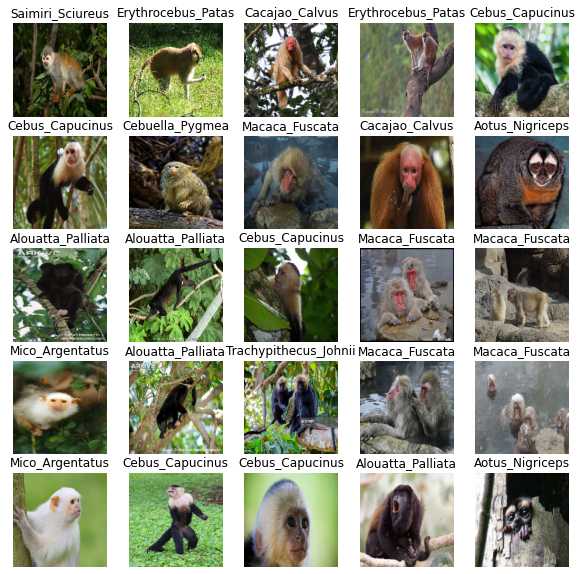

In [65]:
image_batch, label_batch = next(train_it)
show_batch(image_batch, label_batch)

Wady korzystania z kerasa:
    - It's slow. See the performance section below.
    - It lacks fine-grained control.
    - It is not well integrated with the rest of TensorFlow.

Na przyszlosc:
 - czym rozni sie binary od categorical

# TENSOR FLOW HOW TO PREPARE DATA

In [67]:
list_ds_train = tf.data.Dataset.list_files('data/training/training/*/*')

In [68]:
for f in list_ds_train.take(1): print(f.numpy())

b'data/training/training/n9/n9054.jpg'


In [69]:
def get_label(file_path):
    # convert the path to a list of path components
    parts = tf.strings.split(file_path, os.path.sep)
    # The second to last is the class-directory
    # return parts[-2] == CLASS_NAMES - to wtedy jako label zwraca wektor boolean i ma true na swojej labelce
    return parts[-2]

Funkcja do stworzenia tensor'a, rescalingu i standaryzacji wartosci RGB

In [70]:
def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # resize the image to the desired size.
  return tf.image.resize(img, [IMG_WIDTH, IMG_HEIGHT])

In [71]:
def process_path(file_path):
    label = get_label(file_path)
    # load the raw data from the file as a string
    img = tf.io.read_file(file_path)
    img = decode_img(img)
    return img, label

map tworzy dataset par image + label, troche jak lambda -> mapuje podana funckje do kazdego elementu dataset-u podanego - w tym przypadku listy plikow

In [72]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
# Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
labeled_ds_train = list_ds_train.map(process_path, num_parallel_calls=AUTOTUNE)

In [74]:
for image, label in labeled_ds_train.take(1):
    print(image.numpy().shape)
    print(label.numpy())

(224, 224, 3)
b'n3'


Zeby dataset byl dobry brakuje jeszcze:
    - To be well shuffled.
    - To be batched.
    - Batches to be available as soon as possible.

In [75]:
labeled_ds_train = labeled_ds_train.shuffle(buffer_size=1000)
labeled_ds_train = labeled_ds_train.repeat()
labeled_ds_train = labeled_ds_train.batch(BATCH_SIZE)
# `prefetch` lets the dataset fetch batches in the background while the model
# is training.
train_ds = labeled_ds_train.prefetch(buffer_size=AUTOTUNE)

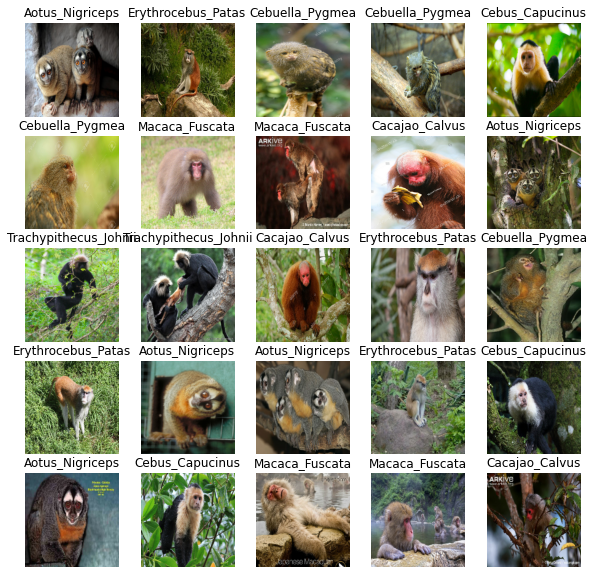

In [76]:
image_batch, label_batch = next(iter(train_ds))
show_batch(image_batch.numpy(), label_batch.numpy(), keras=False)

Once the iterators have been prepared, we can use them when fitting and evaluating a deep learning model.

